In [60]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline


print("All libraries imported successfully!")


All libraries imported successfully!


In [61]:
# Correct file path
file_path = '/Users/skalaliya/Desktop/YouTube/DBSCAN and Agglomerative Clustering/DetailedData.xls'
data = pd.read_excel(file_path)
data = pd.get_dummies(data, columns=['GroupJanTorsten'])


print(data.head())

   tiquettesdelignes  EVA51  HD1   LD1  LLD1  LLDC41  LLD_C81    MB1  MDPE1  \
0             114233   0.00  0.0  0.00   0.0   0.000      0.0  0.040    0.0   
1             112701   0.68  0.0  0.00   0.3   0.000      0.0  0.020    0.0   
2             103597   0.68  0.0  0.00   0.3   0.000      0.0  0.020    0.0   
3             109938   0.00  0.0  0.15   0.0   0.828      0.0  0.022    0.0   
4             110885   0.00  0.0  0.15   0.0   0.832      0.0  0.018    0.0   

   mLLD1  ...  GroupJanTorsten_S-Type  GroupJanTorsten_SFL  \
0    0.0  ...                   False                False   
1    0.0  ...                   False                False   
2    0.0  ...                   False                False   
3    0.0  ...                   False                False   
4    0.0  ...                   False                False   

   GroupJanTorsten_SHT  GroupJanTorsten_SP  GroupJanTorsten_SPL  \
0                False               False                False   
1                F

fine_path = 'DetailedData.xlc'
def load_data(file_path):
    return pd.read_excel(file_path)

In [62]:
# List all files in the specified directory
directory = '/Users/skalaliya/Desktop/YouTube/DBSCAN and Agglomerative Clustering'
files = os.listdir(directory)
print(files)

['.DS_Store', 'code.ipynb', 'cody.py', 'README.md', 'DetailedData.xls', '.git']


In [63]:
# Check if the first column is date and time, and drop it if necessary
if 'Date' in data.columns or 'Time' in data.columns:
    data = data.drop(columns=['Date', 'Time'], errors='ignore')

In [64]:
# Preprocess the data
X = data.values  # Adjust based on your data structure
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Perform PCA
n_components = 40  # Adjust as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [66]:
# Perform DBSCAN clustering
eps_value = 6  # You may need to adjust this value
min_samples_value = 1  # You may need to adjust this value
dbscan = DBSCAN(metric="euclidean", eps=eps_value, min_samples=min_samples_value)
y_dbscan = dbscan.fit_predict(X_pca)

# Check if DBSCAN found more than one cluster
if len(set(y_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(X_pca, y_dbscan)
    print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan:.2f}')
else:
    print("DBSCAN did not find more than one cluster. Try adjusting the parameters.")


DBSCAN Silhouette Score: 0.39


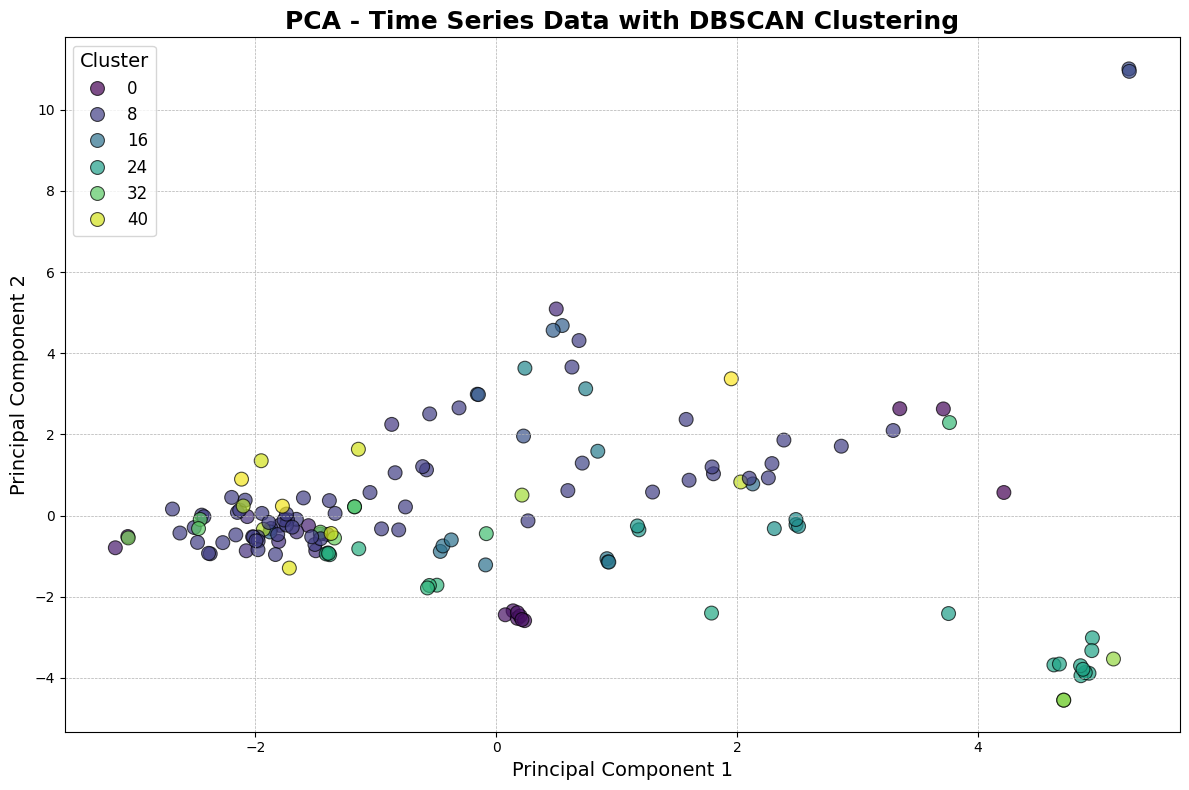

In [72]:
# Visualize clustering results in 2D (DBSCAN)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_dbscan, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('PCA - Time Series Data with DBSCAN Clustering', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

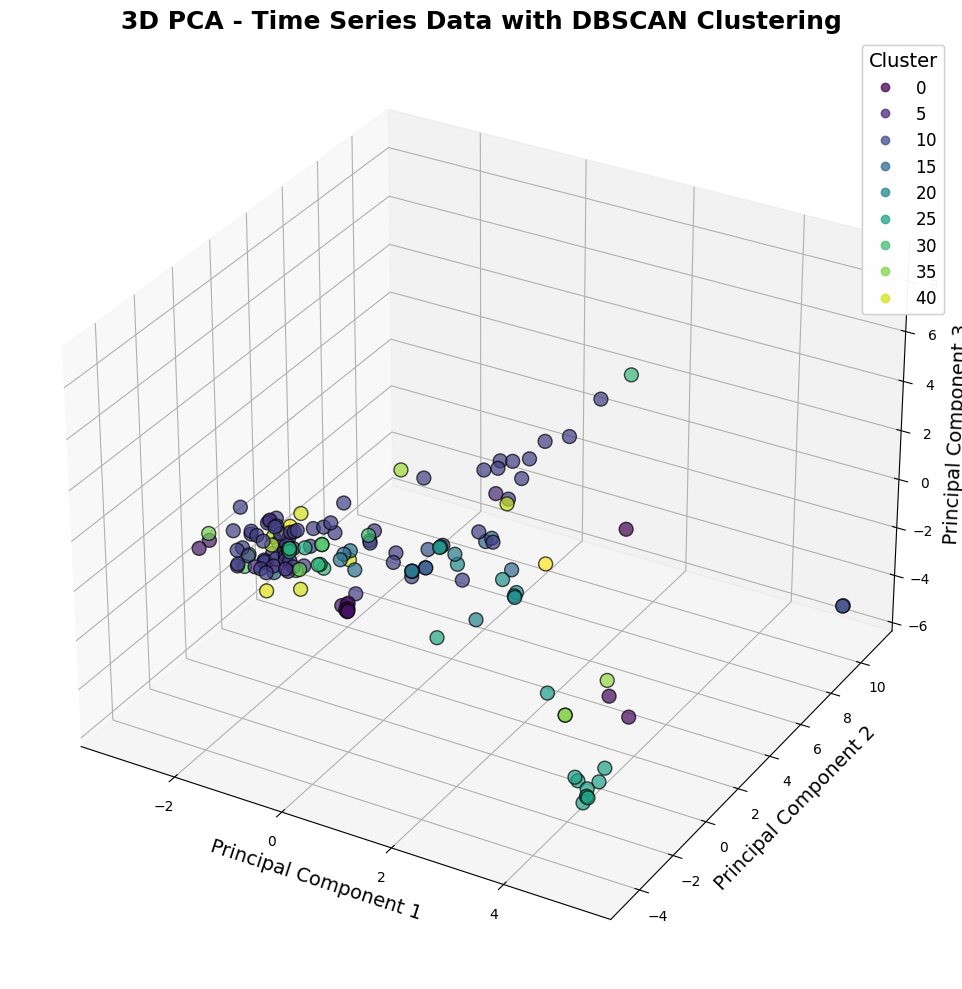

In [74]:
# Visualize clustering results in 3D (DBSCAN)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_dbscan, cmap='viridis', s=100, alpha=0.7, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", fontsize=12, title_fontsize=14)
ax.add_artist(legend1)
ax.set_title('3D PCA - Time Series Data with DBSCAN Clustering', fontsize=18, weight='bold')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [67]:
# Perform Agglomerative clustering
n_clusters = 3  # Adjust as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
y_agg = agglomerative.fit_predict(X_pca)
silhouette_avg_agg = silhouette_score(X_pca, y_agg)
print(f'Agglomerative Clustering Silhouette Score: {silhouette_avg_agg:.2f}')

Agglomerative Clustering Silhouette Score: 0.12


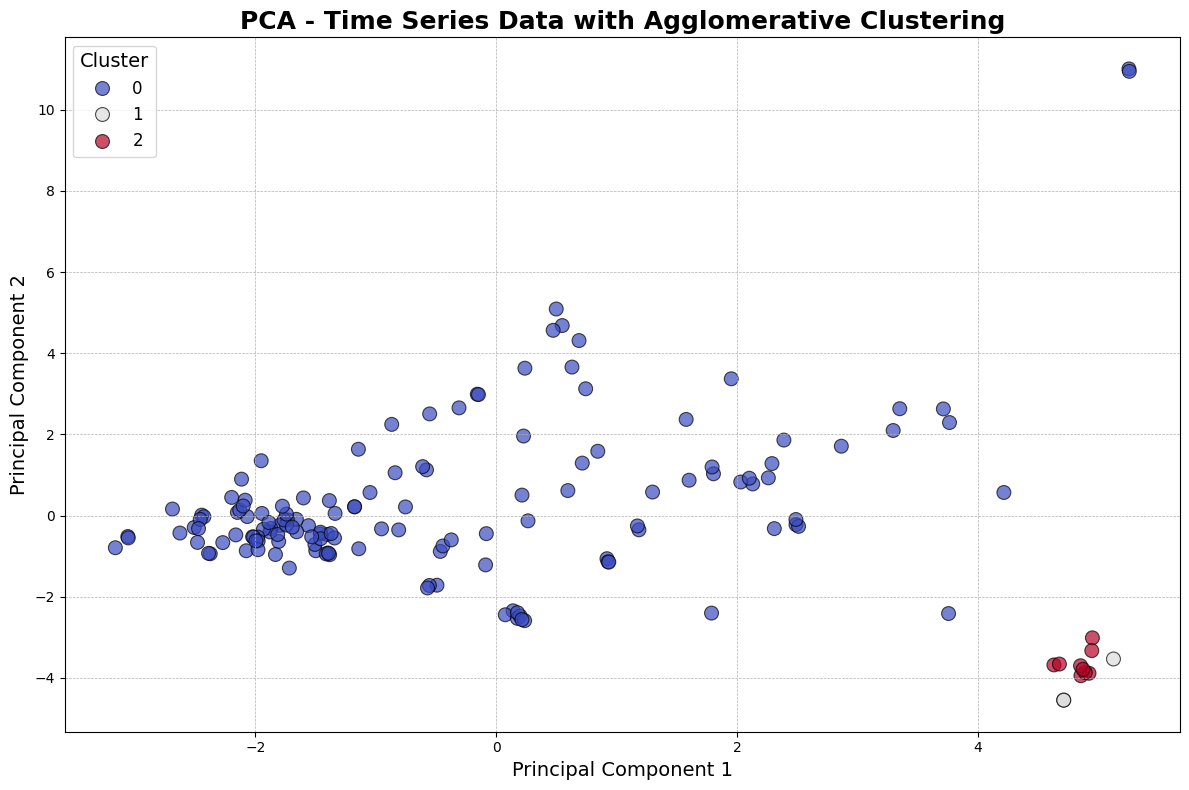

In [73]:
# Visualize clustering results in 2D (Agglomerative Clustering)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_agg, palette='coolwarm', s=100, alpha=0.7, edgecolor='k')
plt.title('PCA - Time Series Data with Agglomerative Clustering', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

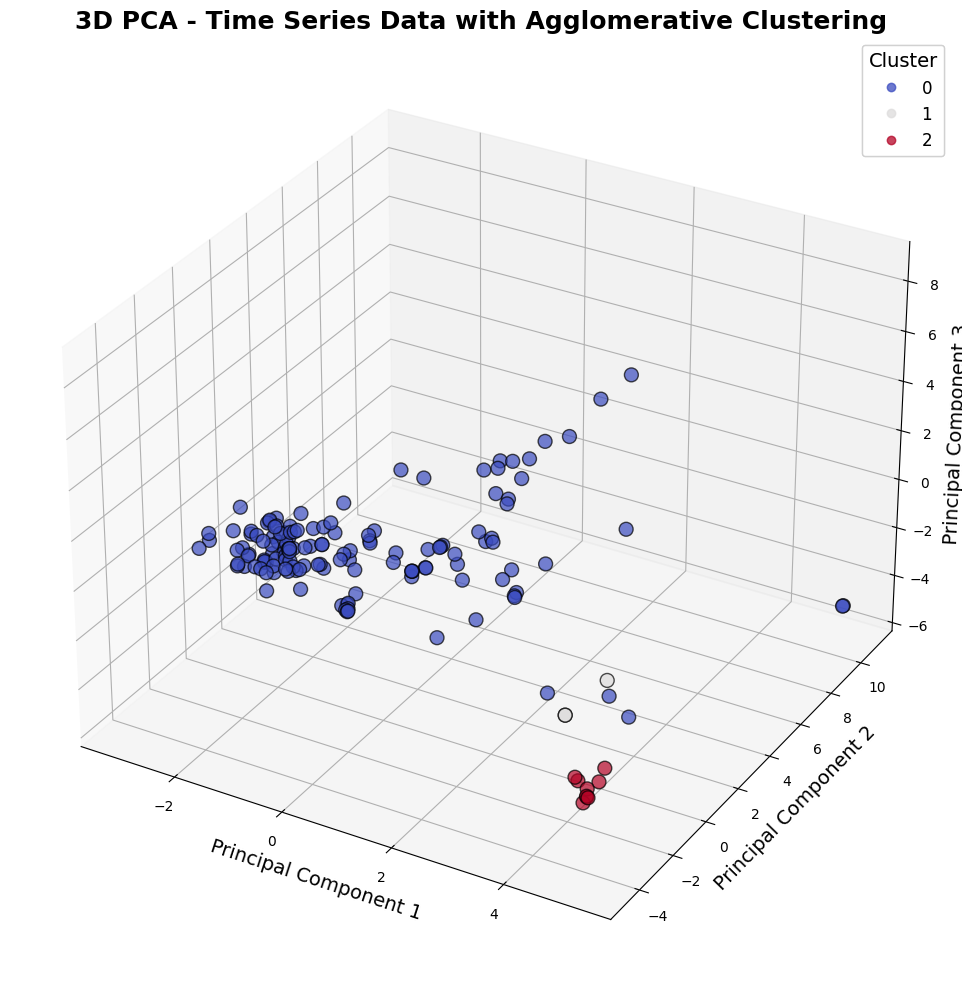

In [76]:
# Visualize clustering results in 3D (Agglomerative Clustering)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_agg, cmap='coolwarm', s=100, alpha=0.7, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", fontsize=12, title_fontsize=14)
ax.add_artist(legend1)
ax.set_title('3D PCA - Time Series Data with Agglomerative Clustering', fontsize=18, weight='bold')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()